In [9]:
import numpy as np
import pymc3 as pm

light_speed = np.array([28, 26, 33, 24, 34, -44, 27, 16, 40, -2, 29, 22, 24, 21, 25,
                        30, 23, 29, 31, 19, 24, 20, 36, 32, 36, 28, 25, 21, 28, 29,
                        37, 25, 28, 26, 30, 32, 36, 26, 30, 22, 36, 23, 27, 27, 28,
                        27, 31, 27, 26, 33, 26, 32, 32, 24, 39, 28, 24, 25, 32, 25,
                        29, 27, 28, 29, 16, 23])

model_1 = pm.Model()

with model_1:
    # priors as specified in stan model
    # mu = pm.Uniform('mu', lower = -tt.inf, upper= np.inf)
    # sigma = pm.Uniform('sigma', lower = 0, upper= np.inf)

    # using vague priors works
    mu = pm.Uniform('mu', lower=light_speed.std() / 1000.0,
                    upper=light_speed.std() * 1000.0)
    sigma = pm.Uniform('sigma', lower=light_speed.std() /
                       1000.0, upper=light_speed.std() * 1000.0)

    # define likelihood
    y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=light_speed)


def run(n=5000):
    with model_1:
        trace = pm.sample(n, njobs=8)

        pm.summary(trace)
        pm.traceplot(trace)
    return trace

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 542.76:   6%|▌         | 12396/200000 [00:01<00:20, 9235.51it/s]
Convergence archived at 12700
Interrupted at 12,700 [6%]: Average Loss = 610.45
100%|██████████| 5500/5500 [00:11<00:00, 466.49it/s]



mu:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  26.217           1.352            0.007            [23.551, 28.844]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  23.580         25.300         26.217         27.130         28.882


sigma:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  10.949           0.987            0.007            [9.032, 12.833]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  9.236          10.255         10.880         11.559         13.082



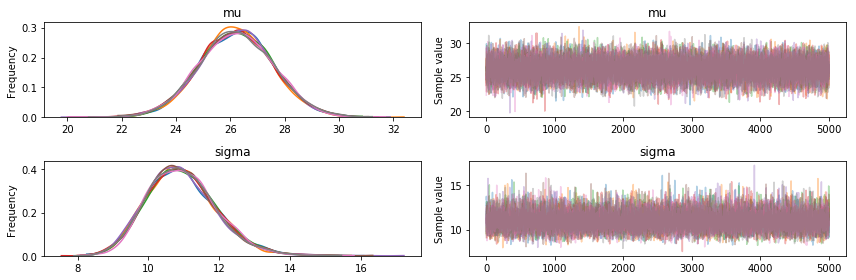

In [10]:
trace = run()

In [26]:
import pprint
for n in trace.stat_names:
    print(n, trace.get_sampler_stats(n))

step_size [ 0.19611019  0.19611019  0.19611019 ...,  0.19300513  0.19300513
  0.19300513]
tune [False False False ..., False False False]
tree_size [ 3.  1.  3. ...,  1.  3.  1.]
mean_tree_accept [ 0.9021253   0.86113794  0.95165178 ...,  0.61081406  0.99150941  1.        ]
step_size_bar [ 0.19611019  0.19611019  0.19611019 ...,  0.19300513  0.19300513
  0.19300513]
diverging [False False False ..., False False False]
energy [ 266.46200671  266.74955997  268.10767002 ...,  264.36636969  264.85905928
  263.84587104]
max_energy_error [-0.47821256  0.14950058 -0.67105237 ...,  0.49296269 -0.44348351
 -0.04631782]
energy_error [ 0.08427972  0.14950058 -0.14281527 ...,  0.49296269 -0.17992737
 -0.04631782]
depth [2 1 2 ..., 1 2 1]


In [29]:
trace.point(10)


{'mu': 28.369468748917772,
 'mu_interval__': -5.9269907848013226,
 'sigma': 10.730099789085735,
 'sigma_interval__': -6.901526998049432}